# Surfs_Up Challenge

In [1]:
# Dependencies
import numpy as np
import pandas as pd # Added dependancy
import datetime as dt # Added dependancy
from datetime import datetime # Added dependancy

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func # Added inspect to dependancies


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Have a good look at the data you will be working with

In [4]:
# Get the name of the table.
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [6]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [7]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [8]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

## D1: Determine the Summary Statistics for June

In [9]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
sel = [Measurement.tobs]
June_Query = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "06")
print(June_Query.all())

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [10]:
#  3. Convert the June temperatures to a list.
print('Here is the form of the input query:\n\n',June_Query)

# Create an empty list
June_List = []

# Fill list from query
for row in June_Query: June_List.append(row)

# Print the resulting list
print('\n\nHere is the list that was created:\n\n',June_List)    


Here is the form of the input query:

 SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE strftime(?, measurement.date) = ?


Here is the list that was created:

 [(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,),

In [11]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_df = pd.DataFrame(June_List, columns=['June Temps'])
June_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [12]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## Additional Anaysis June

In [13]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures & Percepitation for the month of June. 
sel = [Measurement.date, Measurement.tobs, Measurement.prcp]
June_Query2 = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "06")
print(June_Query2.all())

[('2010-06-01', 78.0, 0.0), ('2010-06-02', 76.0, 0.01), ('2010-06-03', 78.0, 0.0), ('2010-06-04', 76.0, 0.0), ('2010-06-05', 77.0, 0.0), ('2010-06-06', 78.0, 0.0), ('2010-06-07', 77.0, 0.0), ('2010-06-08', 78.0, 0.0), ('2010-06-09', 78.0, 0.0), ('2010-06-10', 79.0, 0.0), ('2010-06-11', 78.0, 0.0), ('2010-06-12', 78.0, 0.0), ('2010-06-13', 78.0, 0.0), ('2010-06-14', 77.0, 0.0), ('2010-06-15', 78.0, 0.0), ('2010-06-16', 78.0, 0.0), ('2010-06-17', 77.0, 0.0), ('2010-06-18', 77.0, 0.0), ('2010-06-19', 82.0, 0.0), ('2010-06-20', 78.0, 0.0), ('2010-06-21', 78.0, 0.0), ('2010-06-22', 78.0, 0.0), ('2010-06-23', 78.0, 0.0), ('2010-06-24', 78.0, 0.0), ('2010-06-25', 77.0, 0.0), ('2010-06-26', 76.0, 0.02), ('2010-06-27', 78.0, 0.0), ('2010-06-28', 78.0, 0.0), ('2010-06-29', 78.0, 0.0), ('2010-06-30', 78.0, 0.0), ('2011-06-01', 77.0, 0.07), ('2011-06-02', 78.0, 0.0), ('2011-06-03', 73.0, 0.56), ('2011-06-04', 70.0, 0.89), ('2011-06-05', 76.0, 0.0), ('2011-06-06', 77.0, 0.0), ('2011-06-07', 77.0, 0

In [14]:
June_df = pd.DataFrame(June_Query2, columns=['Date','June Temps','June Rain'])
June_df

,Date,June Temps,June Rain
0,2010-06-01,78.0,0.00
1,2010-06-02,76.0,0.01
2,2010-06-03,78.0,0.00
3,2010-06-04,76.0,0.00
4,2010-06-05,77.0,0.00
...,...,...,...
1695,2017-06-26,79.0,0.02
1696,2017-06-27,74.0,0.10
1697,2017-06-28,74.0,0.02
1698,2017-06-29,76.0,0.04


## How does June change from day to day
Extract the day of the month in June for all years and calculate the mean for that day.

In [16]:
June_df['day'] = pd.DatetimeIndex(June_df['Date']).day
June_df

,Date,June Temps,June Rain,day
0,2010-06-01,78.0,0.00,1
1,2010-06-02,76.0,0.01,2
2,2010-06-03,78.0,0.00,3
3,2010-06-04,76.0,0.00,4
4,2010-06-05,77.0,0.00,5
...,...,...,...,...
1695,2017-06-26,79.0,0.02,26
1696,2017-06-27,74.0,0.10,27
1697,2017-06-28,74.0,0.02,28
1698,2017-06-29,76.0,0.04,29


In [17]:
June_df.sort_values('day', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,Date,June Temps,June Rain,day
0,2010-06-01,78.0,0.00,1
989,2015-06-01,77.0,0.13,1
1018,2016-06-01,75.0,0.38,1
1047,2017-06-01,79.0,0.00,1
1076,2010-06-01,71.0,0.00,1
...,...,...,...,...
1046,2016-06-30,79.0,0.00,30
1075,2017-06-30,75.0,0.07,30
145,2014-06-30,79.0,0.02,30
1644,2015-06-30,72.0,0.00,30


In [18]:
June_df2 = []
June_df2 = June_df.groupby('day')['June Temps'].mean().to_frame('Mean Daily Temperture')
June_df2


,Mean Daily Temperture
day,
1,74.614035
2,74.400000
3,74.034483
4,73.818182
5,74.854545
6,75.175439
7,75.071429
8,75.586207
9,75.152542


<AxesSubplot:>

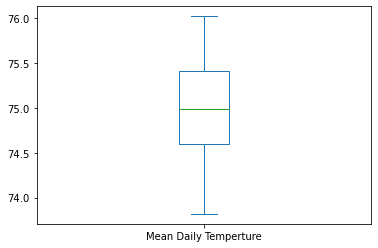

In [19]:
June_df2.plot(kind='box')

In [20]:
June_df3 = []
June_df3 = June_df.groupby('day')['June Rain'].mean().to_frame('Mean Daily Precipitation')
June_df3

,Mean Daily Precipitation
day,
1,0.199245
2,0.119423
3,0.180000
4,0.279412
5,0.194231
6,0.082308
7,0.076923
8,0.044423
9,0.084528


<AxesSubplot:>

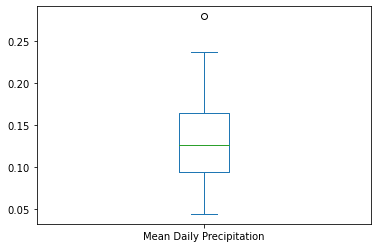

In [21]:
June_df3.plot( kind='box')

## D2: Determine the Summary Statistics for December

In [22]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
sel = [Measurement.tobs]
Dec_Query = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "12")
print(Dec_Query.all())

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [23]:
# 7. Convert the December temperatures to a list.
print('Here is the form of the input query:\n\n',Dec_Query)

# Create an empty list
Dec_List = []

# Fill list from query
for row in Dec_Query: Dec_List.append(row)

# Print the resulting list
print('\n\nHere is the list that was created:\n\n',Dec_List) 

Here is the form of the input query:

 SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE strftime(?, measurement.date) = ?


Here is the list that was created:

 [(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,),

In [24]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_df = pd.DataFrame(Dec_List, columns=['December Temps'])
Dec_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [25]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional Anaysis December

In [27]:
# Write a query that filters the Measurement table to retrieve the temperatures & Percepitation for the month of December. 
sel = [Measurement.date, Measurement.tobs, Measurement.prcp]
Dec_Query2 = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "12")
print(Dec_Query2.all())

[('2010-12-01', 76.0, 0.04), ('2010-12-03', 74.0, 0.0), ('2010-12-04', 74.0, 0.0), ('2010-12-06', 64.0, 0.0), ('2010-12-07', 64.0, 0.0), ('2010-12-08', 67.0, 0.0), ('2010-12-09', 77.0, 0.0), ('2010-12-10', 66.0, 1.58), ('2010-12-11', 69.0, 0.77), ('2010-12-12', 68.0, 0.0), ('2010-12-13', 68.0, 0.0), ('2010-12-14', 71.0, 0.0), ('2010-12-15', 74.0, 0.0), ('2010-12-16', 67.0, 0.0), ('2010-12-17', 66.0, 0.0), ('2010-12-18', 69.0, 0.0), ('2010-12-19', 71.0, 1.4), ('2010-12-23', 70.0, 0.0), ('2010-12-24', 70.0, 0.0), ('2010-12-26', 74.0, None), ('2010-12-27', 74.0, 0.13), ('2010-12-28', 71.0, 0.55), ('2010-12-29', 75.0, 0.06), ('2010-12-30', 75.0, 0.01), ('2010-12-31', 72.0, 0.0), ('2011-12-01', 69.0, 0.03), ('2011-12-02', 68.0, 0.08), ('2011-12-03', 73.0, 0.0), ('2011-12-04', 74.0, 0.0), ('2011-12-05', 73.0, 0.0), ('2011-12-06', 73.0, 0.0), ('2011-12-07', 73.0, 0.0), ('2011-12-08', 73.0, 0.0), ('2011-12-09', 71.0, 0.13), ('2011-12-10', 73.0, 0.07), ('2011-12-11', 73.0, 0.07), ('2011-12-12',

In [28]:
Dec_df = pd.DataFrame(Dec_Query2, columns=['Date','Dec Temps','Dec Rain'])
Dec_df

,Date,Dec Temps,Dec Rain
0,2010-12-01,76.0,0.04
1,2010-12-03,74.0,0.00
2,2010-12-04,74.0,0.00
3,2010-12-06,64.0,0.00
4,2010-12-07,64.0,0.00
...,...,...,...
1512,2016-12-27,71.0,0.14
1513,2016-12-28,71.0,0.14
1514,2016-12-29,69.0,1.03
1515,2016-12-30,65.0,2.37


## How does December change from day to day
Extract the day of the month in December for all years and calculate the mean for that day.

In [29]:
Dec_df['day'] = pd.DatetimeIndex(Dec_df['Date']).day
Dec_df

,Date,Dec Temps,Dec Rain,day
0,2010-12-01,76.0,0.04,1
1,2010-12-03,74.0,0.00,3
2,2010-12-04,74.0,0.00,4
3,2010-12-06,64.0,0.00,6
4,2010-12-07,64.0,0.00,7
...,...,...,...,...
1512,2016-12-27,71.0,0.14,27
1513,2016-12-28,71.0,0.14,28
1514,2016-12-29,69.0,1.03,29
1515,2016-12-30,65.0,2.37,30


In [30]:
Dec_df.sort_values('day', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,Date,Dec Temps,Dec Rain,day
0,2010-12-01,76.0,0.04,1
1459,2015-12-01,73.0,0.03,1
732,2010-12-01,78.0,0.03,1
763,2011-12-01,69.0,0.12,1
303,2013-12-01,76.0,0.00,1
...,...,...,...,...
1431,2013-12-31,71.0,0.00,31
1096,2014-12-31,59.0,0.66,31
1486,2015-12-31,69.0,0.10,31
855,2013-12-31,73.0,0.17,31


In [31]:
Dec_df2 = []
Dec_df2 = Dec_df.groupby('day')['Dec Temps'].mean().to_frame('Mean Daily Temperture')
Dec_df2


,Mean Daily Temperture
day,
1,71.916667
2,71.326923
3,72.886792
4,72.176471
5,70.921569
6,69.392157
7,69.200000
8,70.274510
9,71.901961


<AxesSubplot:>

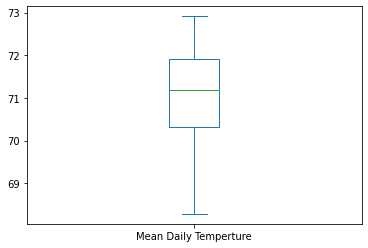

In [32]:
Dec_df2.plot(kind='box')

In [33]:
Dec_df3 = []
Dec_df3 = Dec_df.groupby('day')['Dec Rain'].mean().to_frame('Mean Daily Precipitation')
Dec_df3

,Mean Daily Precipitation
day,
1,0.172609
2,0.321489
3,0.246122
4,0.180204
5,0.120000
6,0.046383
7,0.022273
8,0.041064
9,0.106522


<AxesSubplot:>

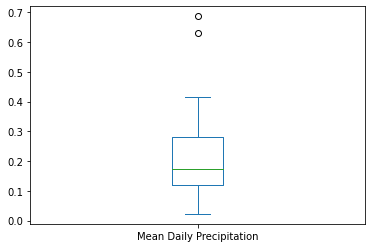

In [34]:
Dec_df3.plot( kind='box')